In [60]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics

In [42]:
#reading in the state abbreviations
path = '../google_trends/statesAbbrev.csv'
statesAbbrev_df = pd.read_csv(path)
statesAbbrev_df.head(12)

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [43]:
#list for state codes
state_codes = [x for x in statesAbbrev_df['Code']]

In [44]:
#list for state names
state_names = [x for x in statesAbbrev_df['State']]

In [45]:
#creating a df dict to hold the state dfs, reading in the dfs
states_df_dict = {}
for x in (4, 50):
    path = f'../google_trends/google_trends_csvs/state_csvs/US-{state_codes[x]}_cat_data.csv'
    states_df_dict[f'{state_codes[x]}_data_df'] = [pd.read_csv(path)]

In [46]:
#inspecting the keys (ie df names)
states_df_dict.keys()

dict_keys(['CA_data_df', 'WY_data_df'])

In [47]:
#test printing a df
print(state_codes[4])
states_df_dict[f'{state_codes[4]}_data_df'][0].head(10)

CA


,time,arts_entertainment,autos,beauty_fitness,books_lit,action_adventure,campaigns_elections,celebs,discrimination,entertainment_media,...,mobiles,online_vids,scifi_fantasy,sport_news,tv_shows,voice_vid_chat,weather,covid_cases,stay_at_home,mass_gathering_ban
0,2019-01-06,98,82,95,80,70,0,71,24,86,...,53,84,56,87,92,64,66,NaN,False,False
1,2019-01-13,96,81,89,82,72,0,66,27,78,...,52,86,56,74,88,59,82,NaN,False,False
2,2019-01-20,88,78,90,79,67,0,58,29,74,...,50,83,54,71,87,51,37,NaN,False,False
3,2019-01-27,93,78,89,82,65,0,63,32,70,...,52,82,55,74,85,67,75,NaN,False,False
4,2019-02-03,89,79,88,81,61,0,60,25,67,...,49,81,51,73,85,62,88,NaN,False,False
5,2019-02-10,96,78,84,84,59,0,62,31,71,...,49,83,58,63,87,60,100,NaN,False,False
6,2019-02-17,96,83,88,79,66,0,78,30,73,...,54,79,54,65,85,67,72,NaN,False,False
7,2019-02-24,99,82,86,90,61,0,70,35,69,...,53,80,53,68,92,63,66,NaN,False,False
8,2019-03-03,100,86,92,88,63,0,58,77,71,...,51,80,55,76,100,73,76,NaN,False,False
9,2019-03-10,94,83,90,82,60,0,62,29,70,...,49,80,52,90,90,64,46,NaN,False,False


In [48]:
#creating a list of all the columns
col_names = list(states_df_dict[f'{state_codes[4]}_data_df'][0].columns)

In [49]:
#using the col list to extract the categories
cat_names = [x for x in col_names if x not in ['time', 'covid_cases', 'stay_at_home', 'mass_gathering_ban']]

In [50]:
#extracting times from the df
times_list = list(states_df_dict[f'{state_codes[4]}_data_df'][0]['time'])

In [51]:
times_2020 = times_list[52:]
times_2019 = times_list[:52]

In [52]:
#making sure there is only 1 df w/in the dict per state (in case you need to clear any badly done extra dfs from the function below)
#for x in range(40, 51):
    #for y in range(1, len(states_df_dict[f'{state_codes[x]}_data_df'])):
        #del(states_df_dict[f'{state_codes[x]}_data_df'][y])
    #print(state_codes[x])
    #print(len(states_df_dict[f'{state_codes[x]}_data_df']))

In [53]:
ca_data_2019 = states_df_dict[f'{state_codes[4]}_data_df'][0].iloc[:52, :]
ca_data_2020 = states_df_dict[f'{state_codes[4]}_data_df'][0].iloc[52:, :]

wy_data_2019 = states_df_dict[f'{state_codes[50]}_data_df'][0].iloc[:52, :]
wy_data_2020 = states_df_dict[f'{state_codes[50]}_data_df'][0].iloc[52:, :]

In [54]:
ca_data_2020.reset_index(drop=True, inplace=True)
wy_data_2020.reset_index(drop=True, inplace=True)

In [66]:
def year_diff_graphs (df2019, df2020, state_name):
    for cat in cat_names:
        cat_diffs_list = []
        for t in range(0, len(times_2020)):
            diff = df2020.loc[t, cat] - df2019.loc[t, cat]
            cat_diffs_list.append(diff)
        
        cat_diffs_mean = statistics.mean(cat_diffs_list)
        stdev = statistics.stdev(cat_diffs_list)
        topline = cat_diffs_mean + stdev
        bottomline = cat_diffs_mean - stdev
        
        x_axis = times_2020
        y_axis = cat_diffs_list
        
        plt.figure(figsize=(20, 7))
        plt.plot(x_axis, y_axis)
        
        plt.axhline(y=topline, color='green', linestyle=':', label= '+1SD')
        plt.axhline(y=bottomline, color='blue', linestyle=':', label= '-1SD')
        plt.axhline(y=cat_diffs_mean, color='purple', linestyle='--', label= 'mean diff')
        plt.legend(loc='best')
        
        plt.grid()
        plt.xticks(rotation=90)
        plt.xlabel('time')
        plt.ylabel('difference (2020-2019) category popularity')
        plt.title(f'differences in 2019 and 2020 in category {cat} popularity over 2020 timescale in {state_name}')
        
        plt.savefig(f'ca_wy_graphs/{state_name.lower()}_{cat}_years_diff.png')
        
        plt.show()    

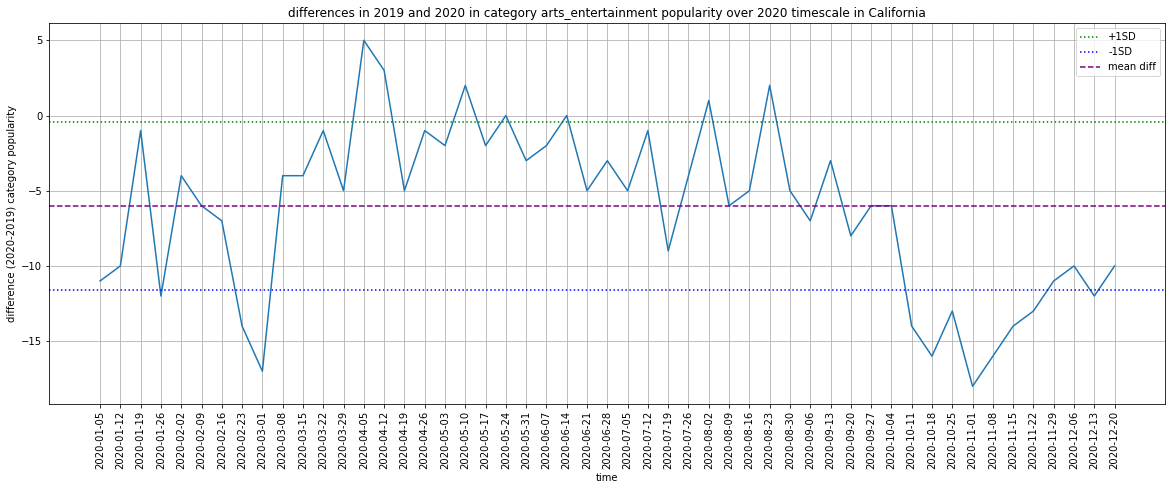

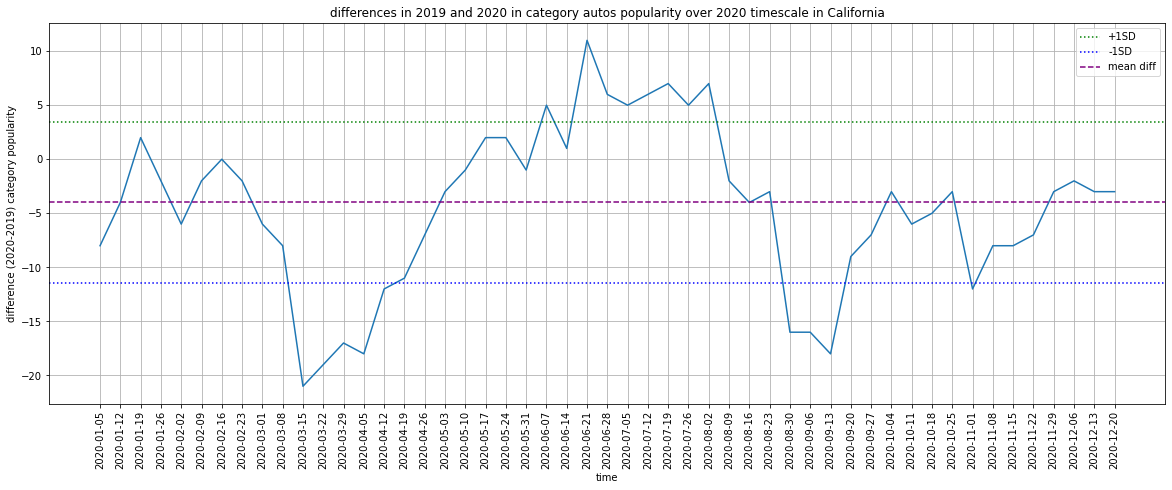

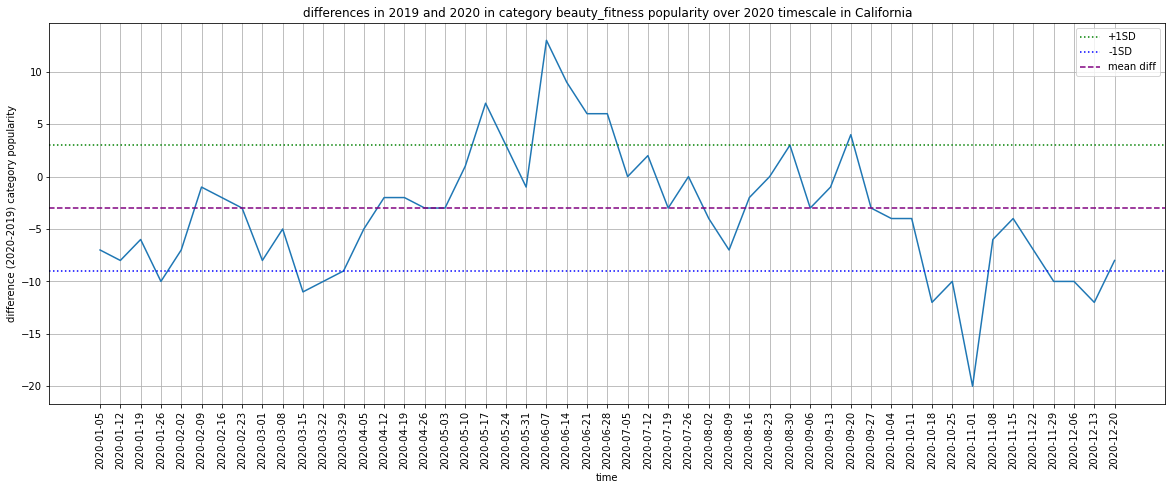

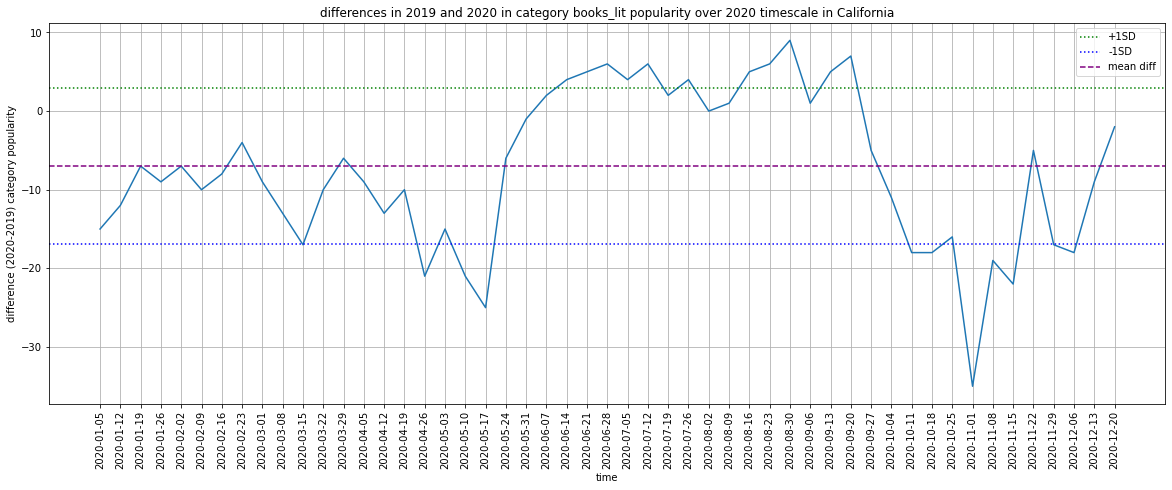

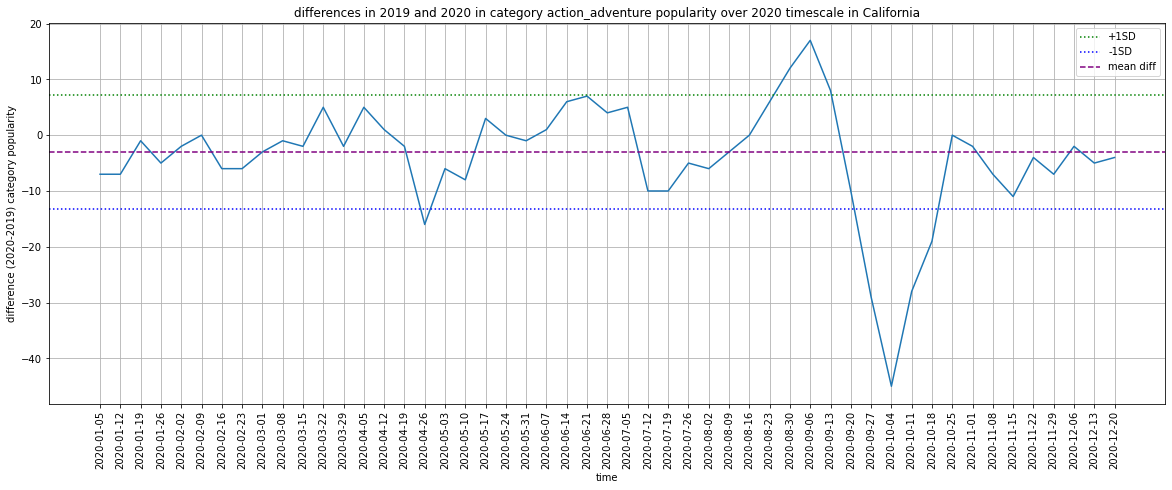

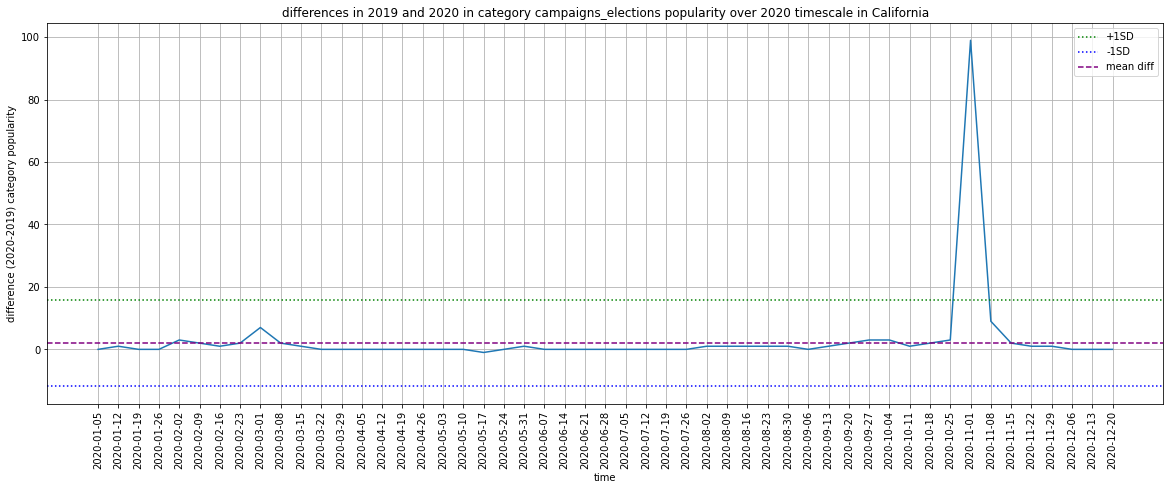

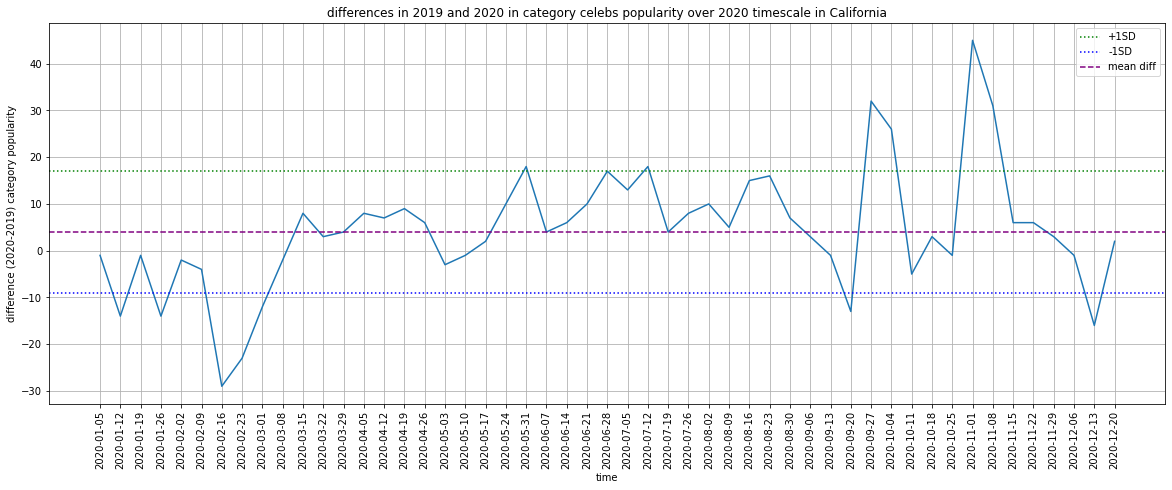

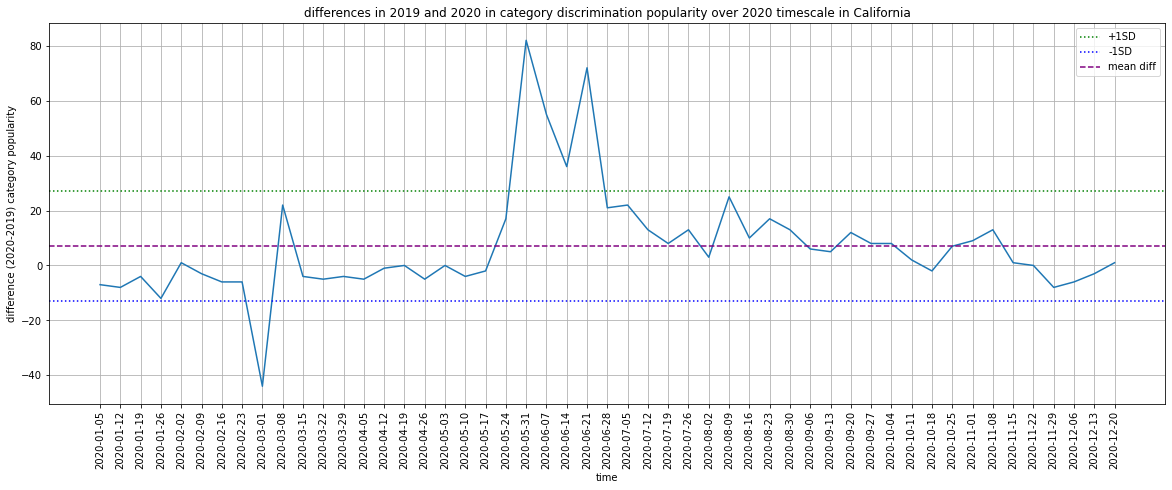

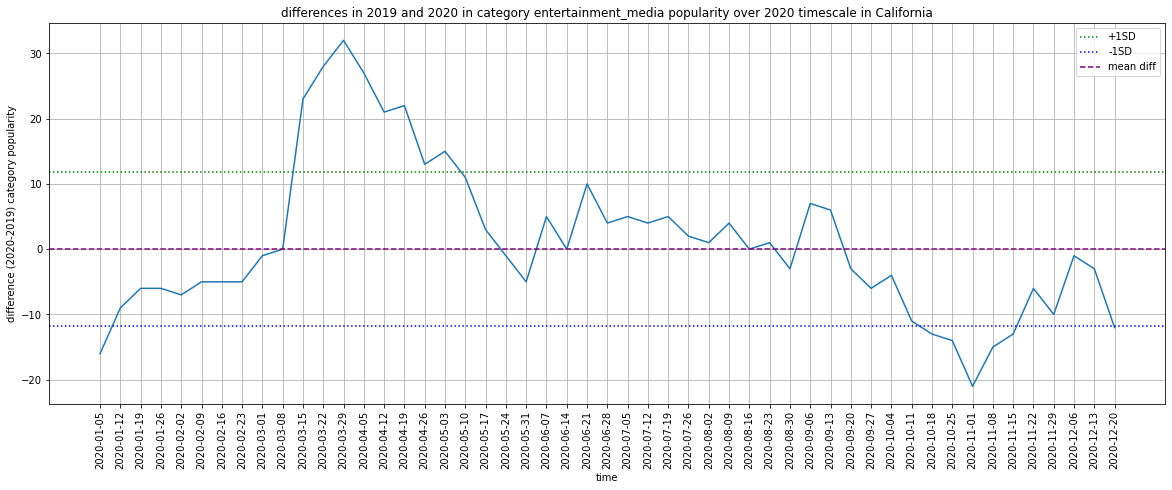

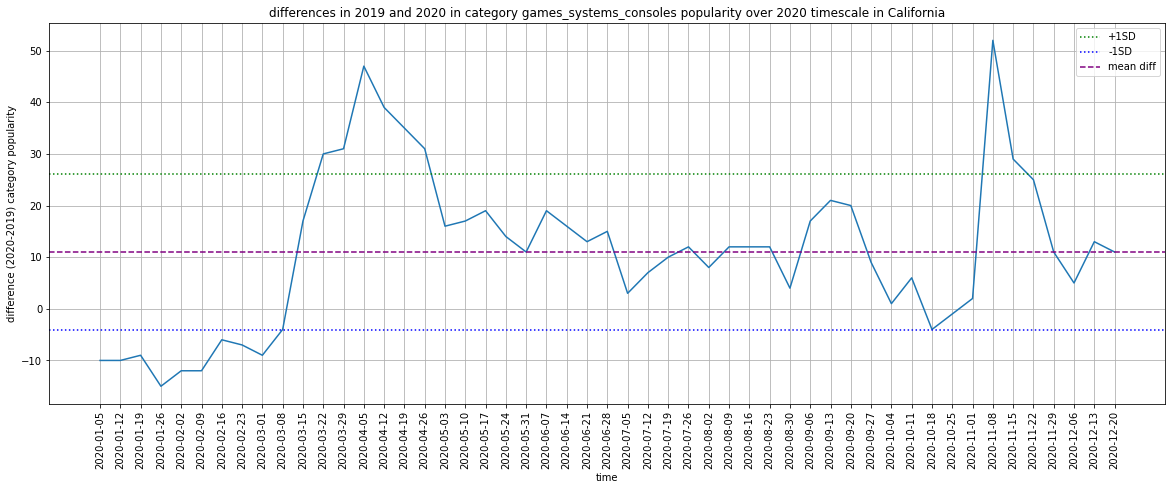

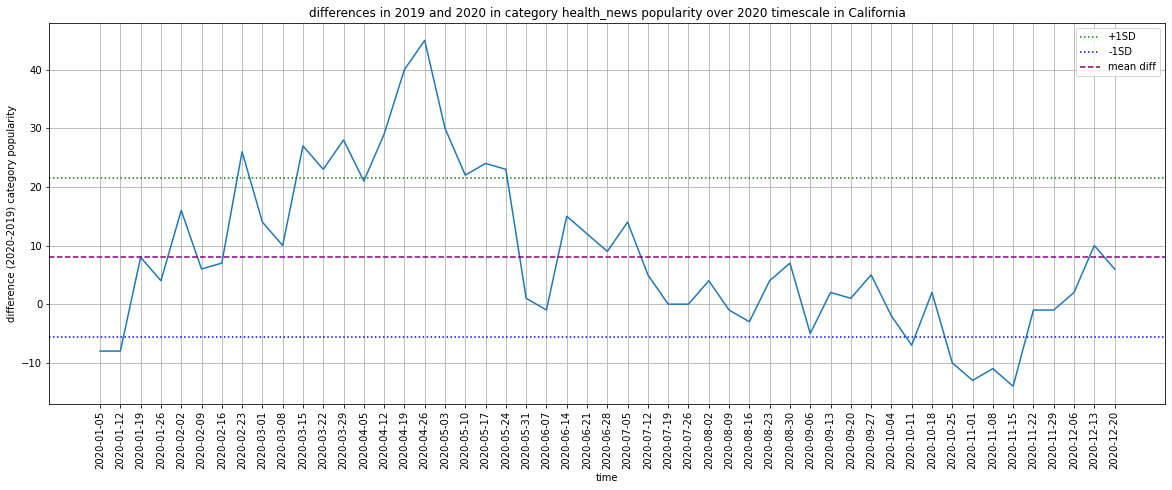

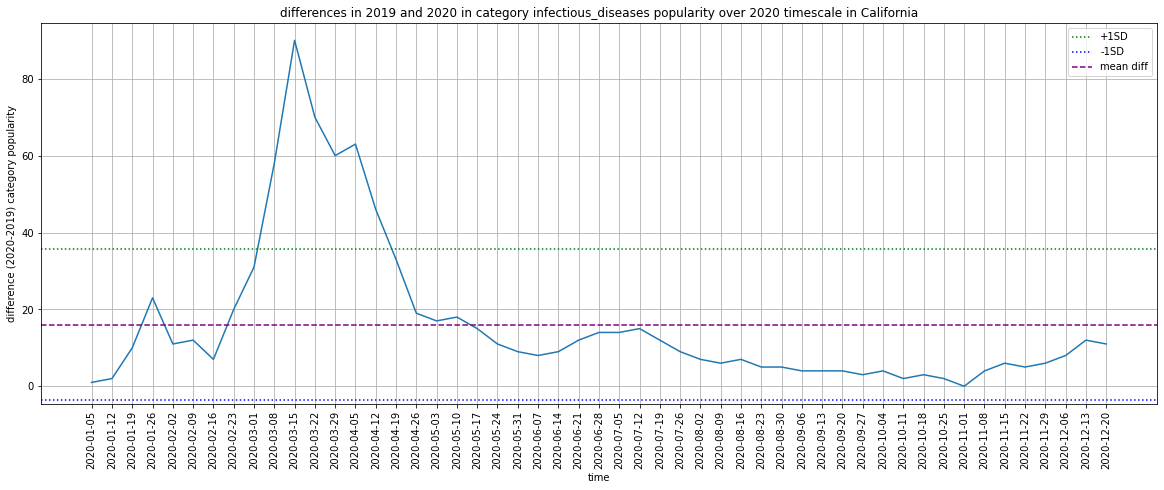

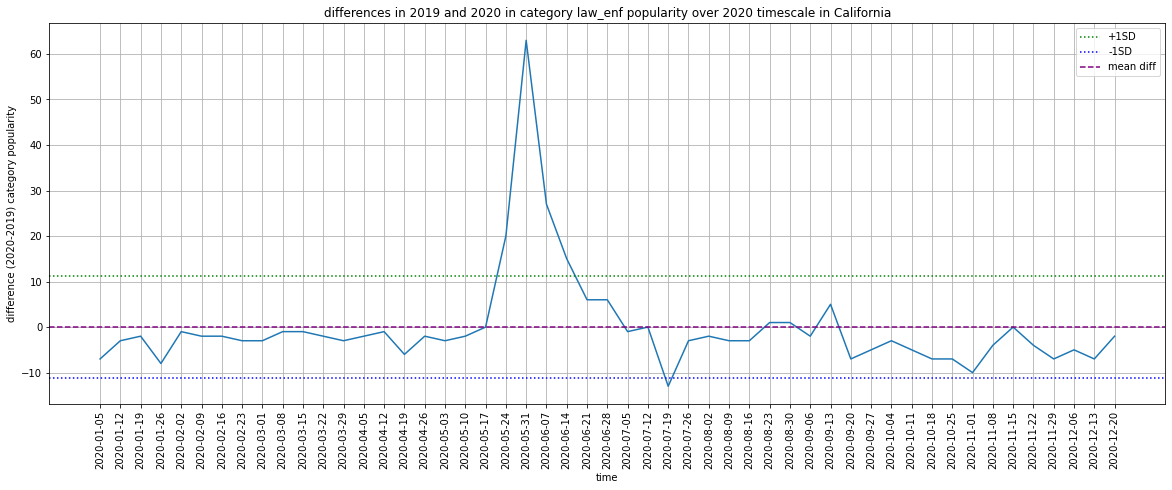

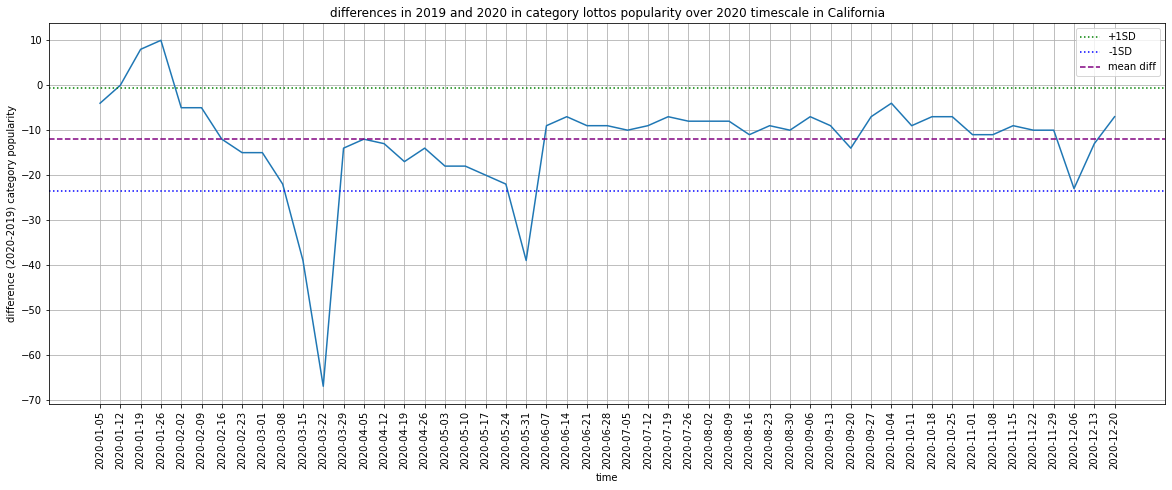

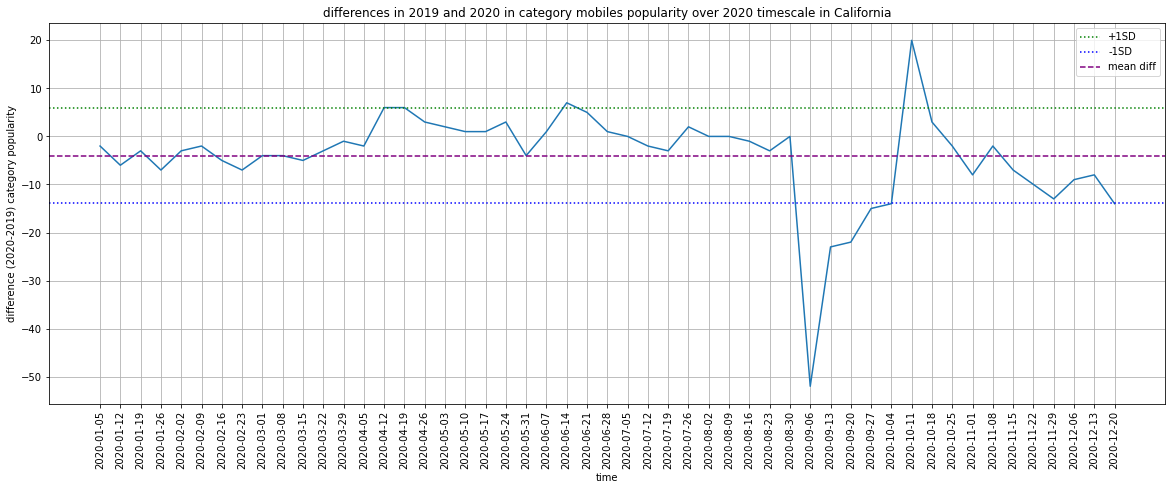

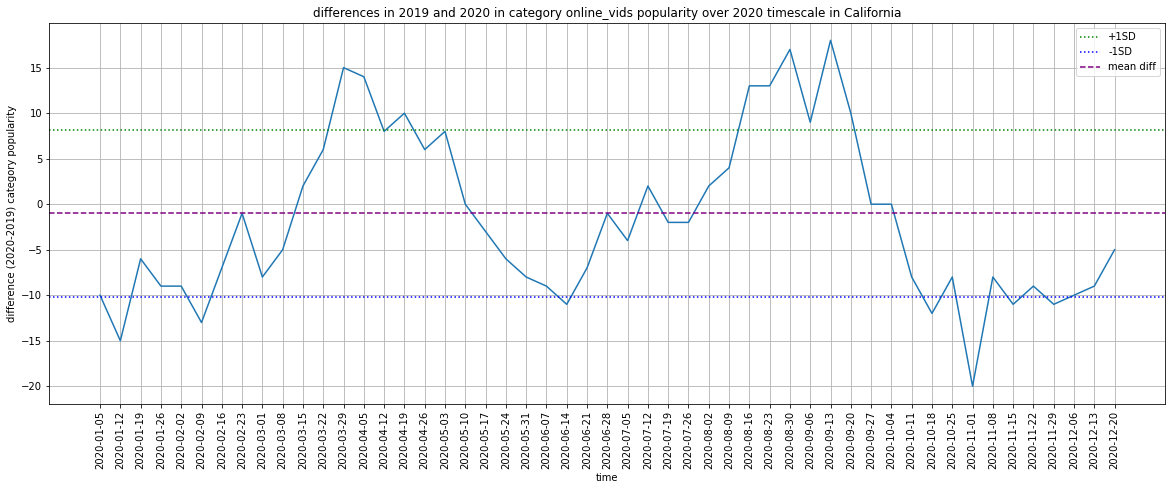

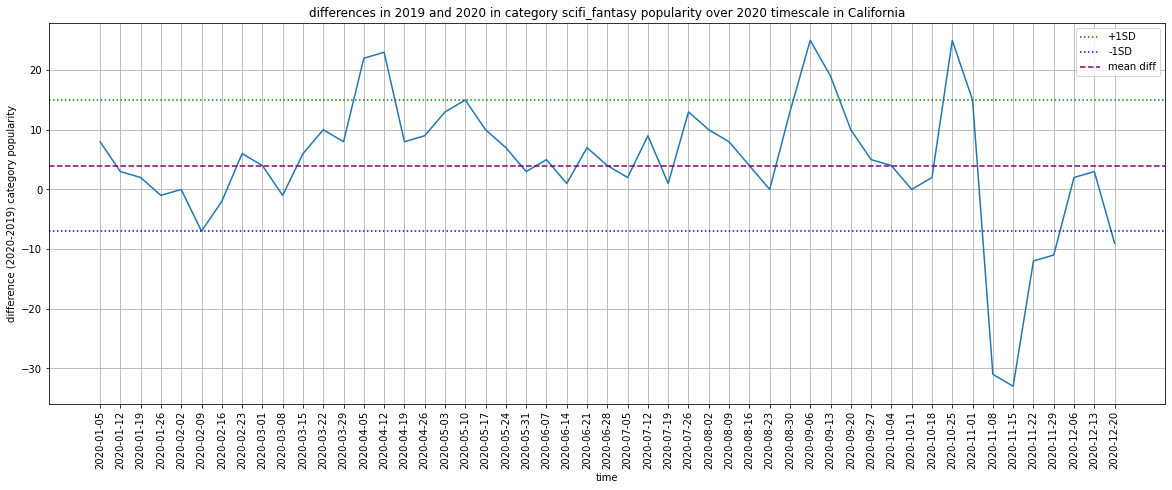

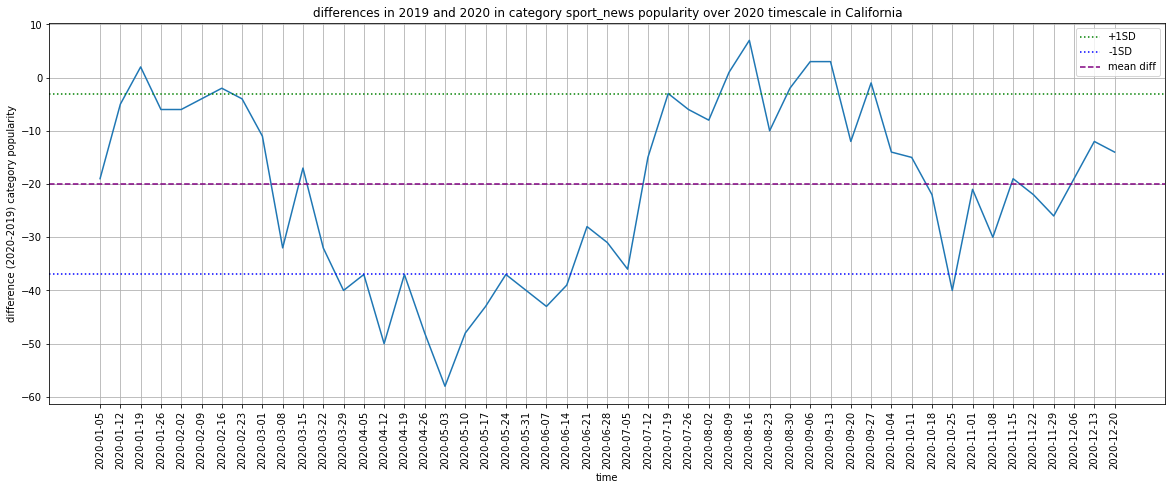

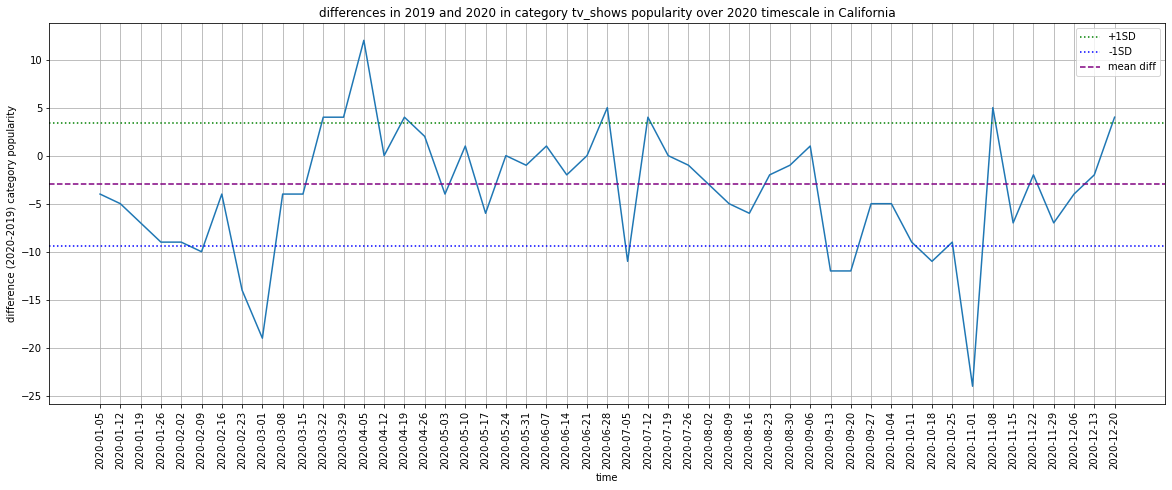

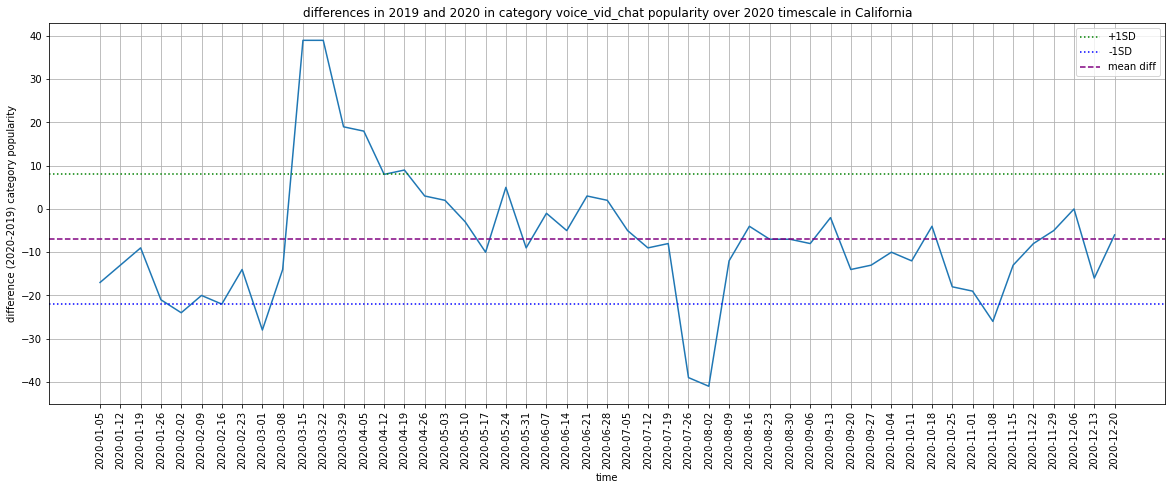

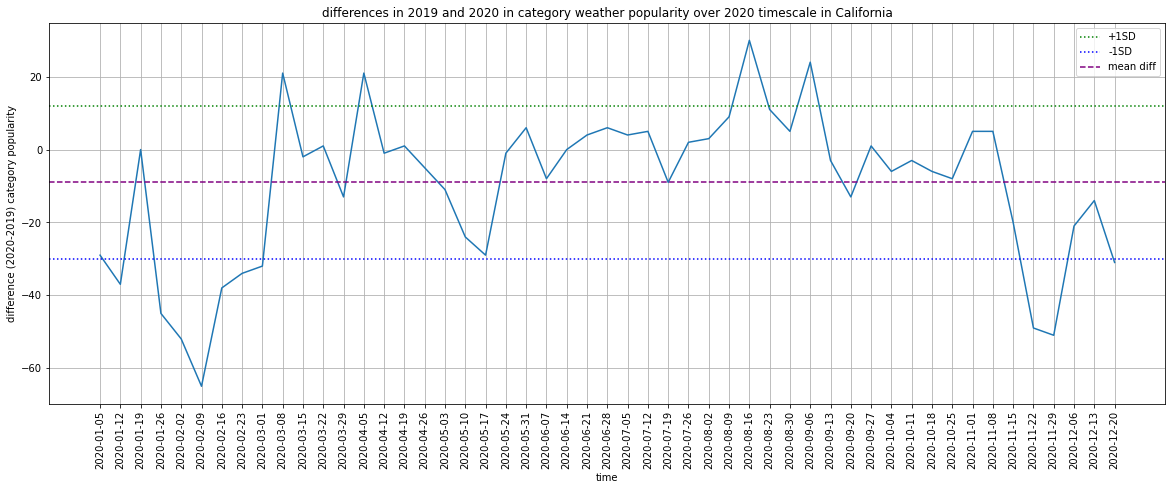

In [67]:
year_diff_graphs(ca_data_2019, ca_data_2020, 'California')

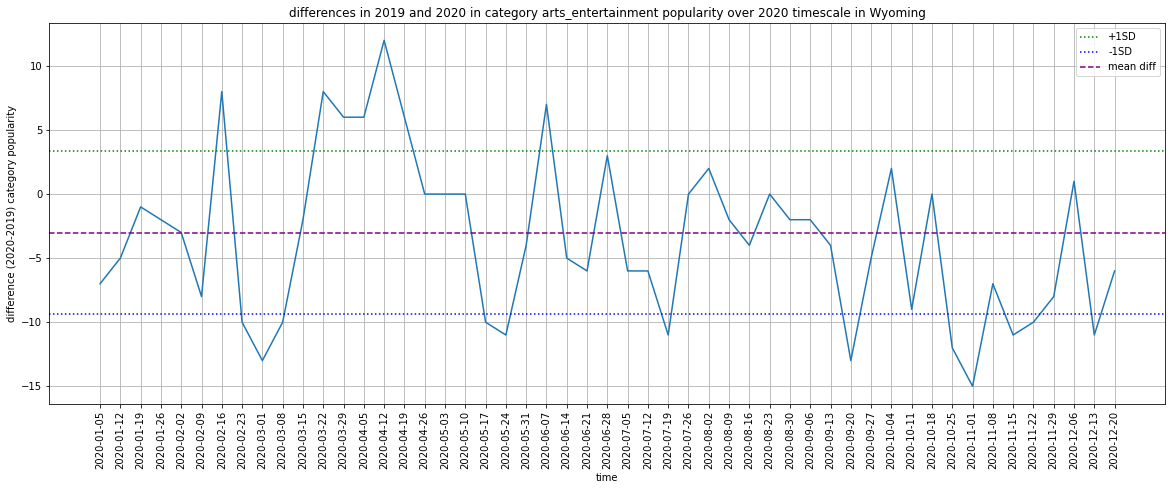

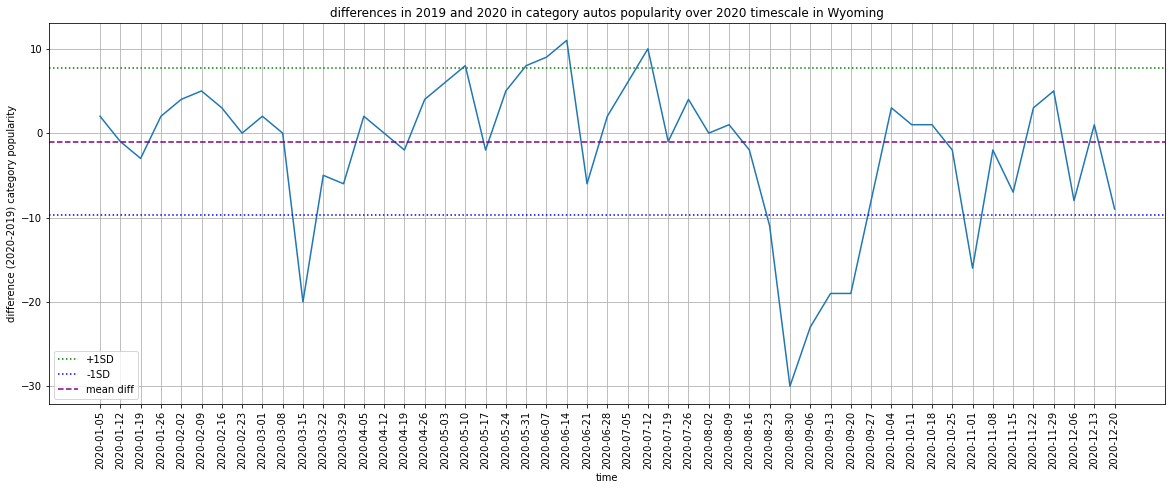

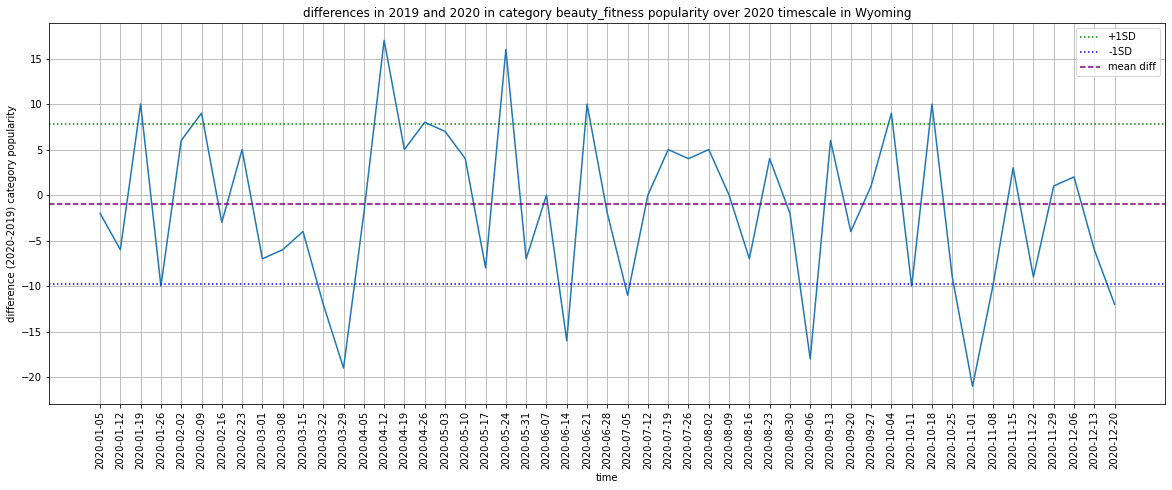

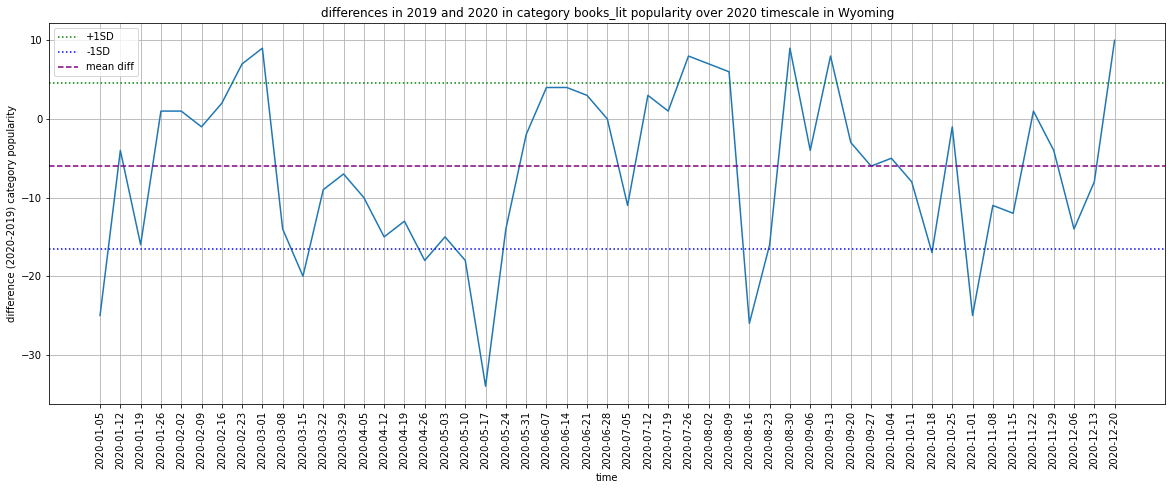

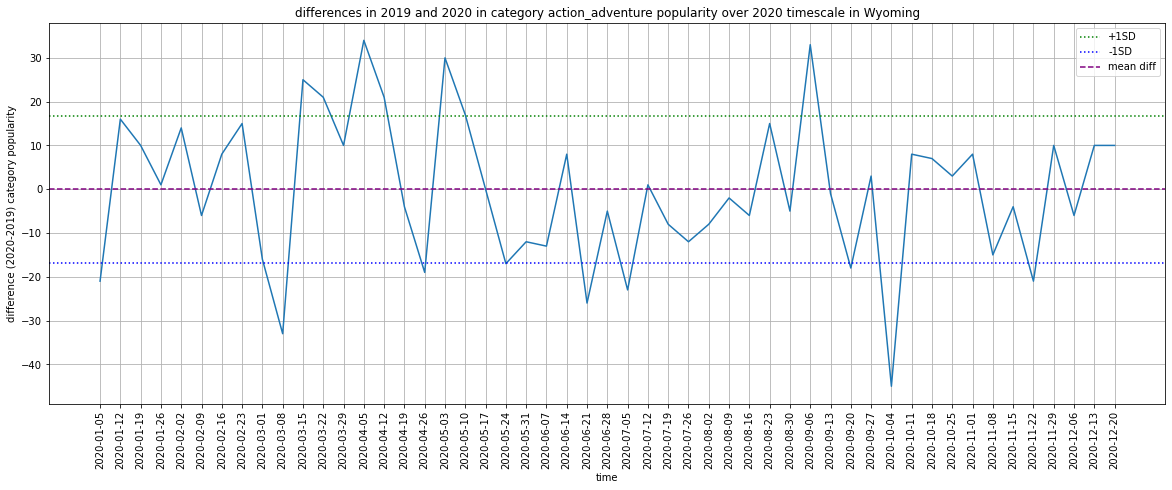

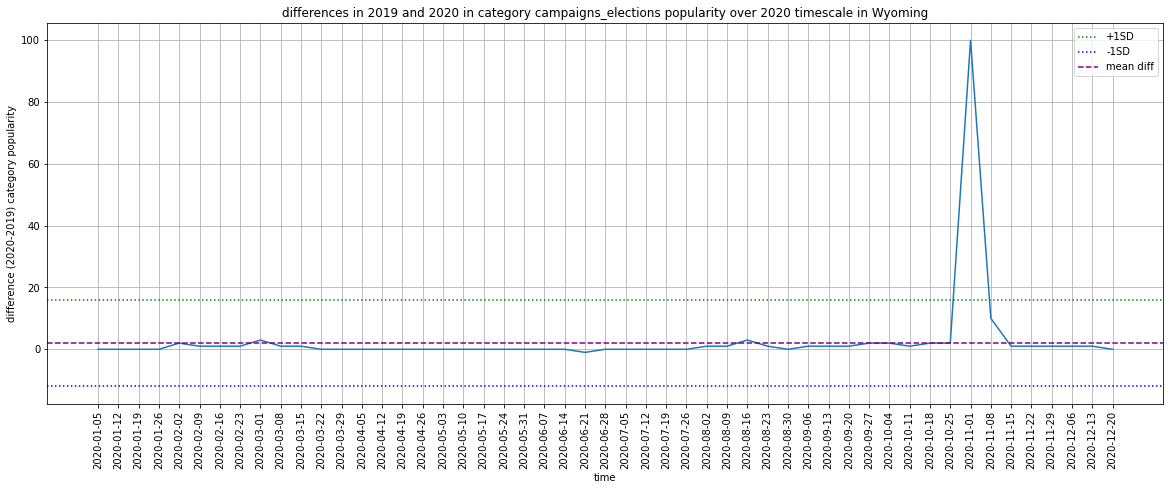

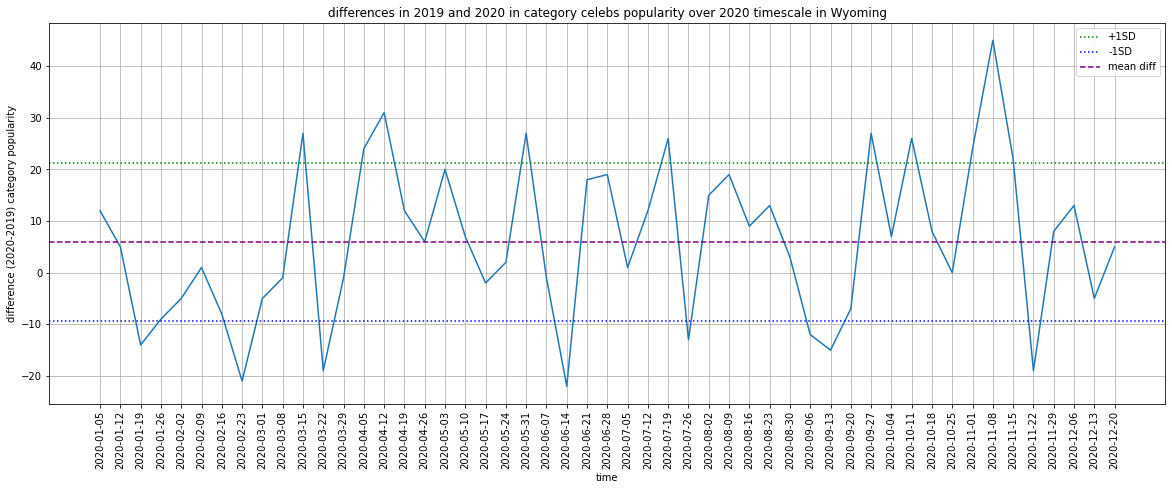

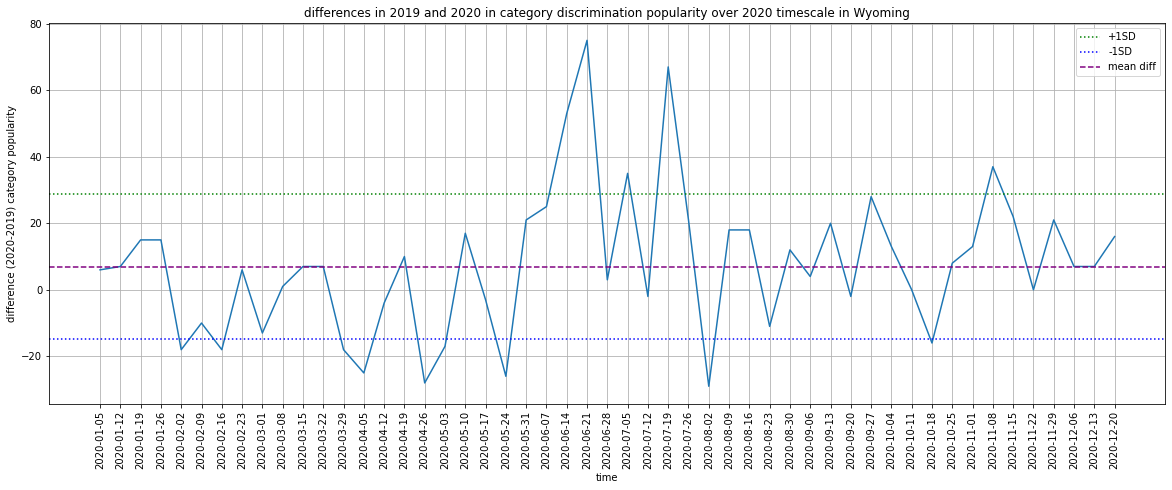

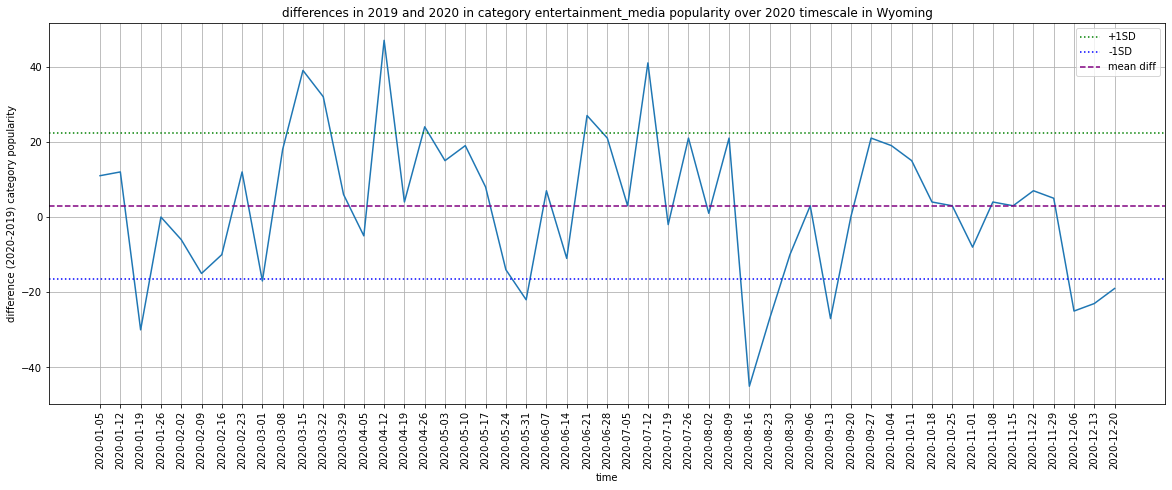

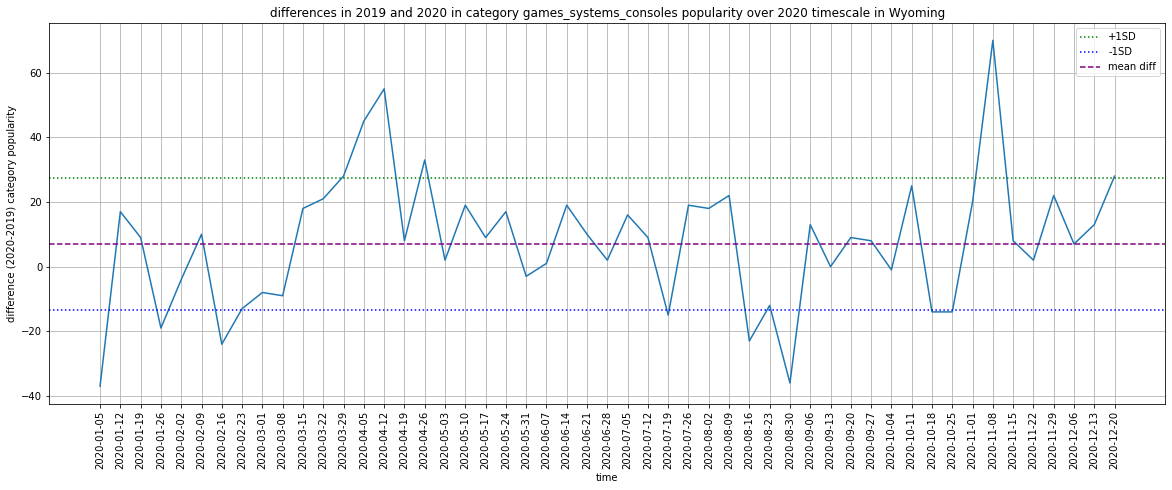

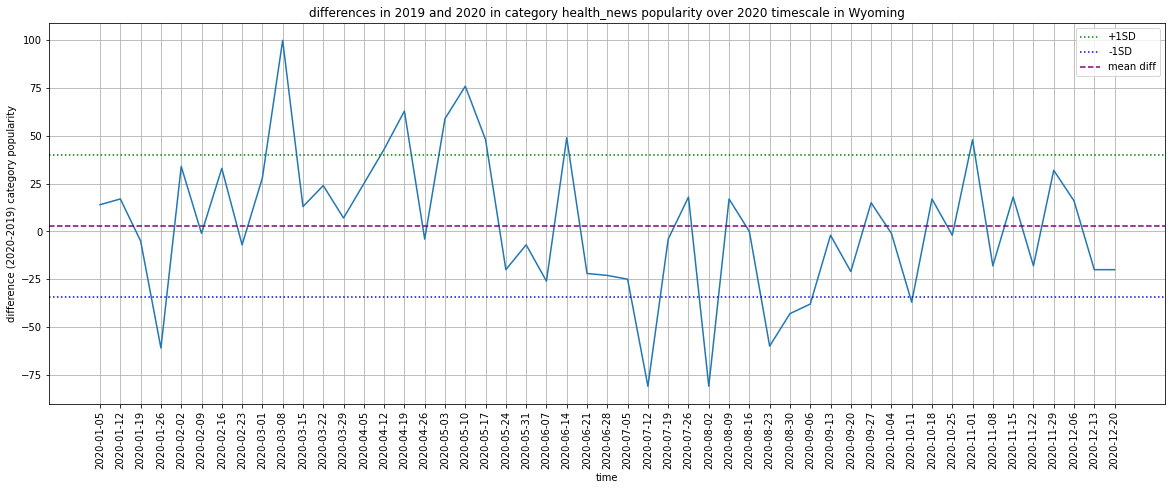

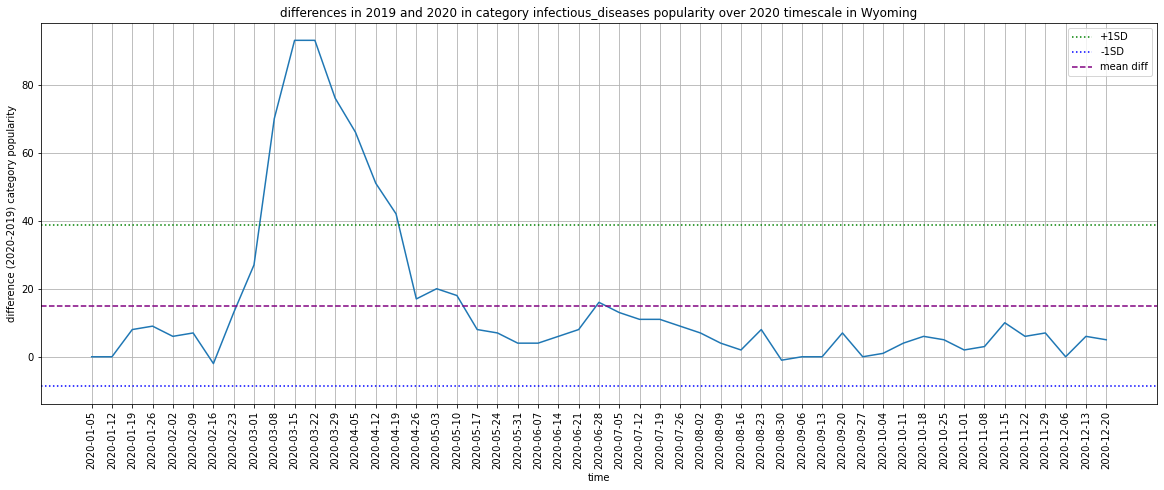

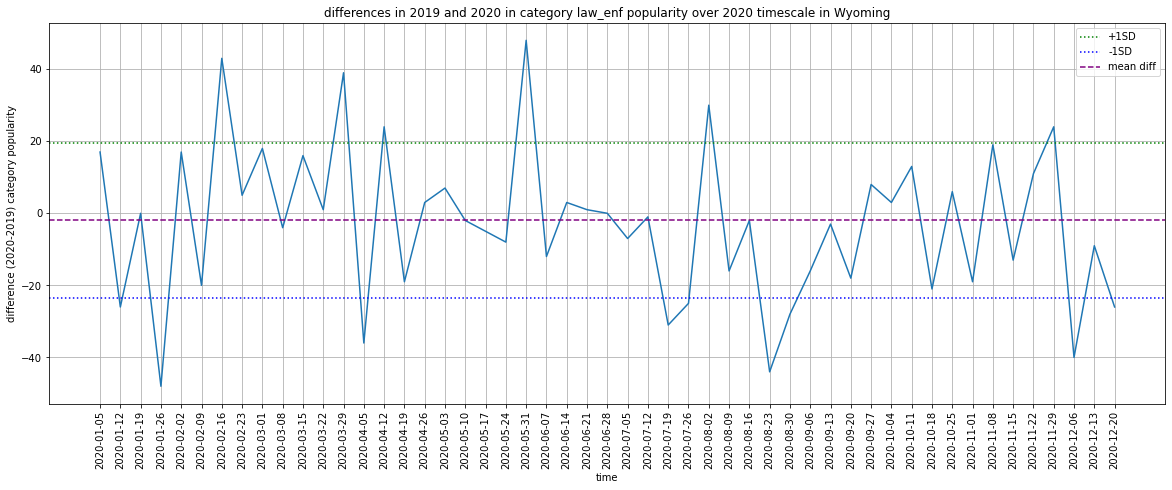

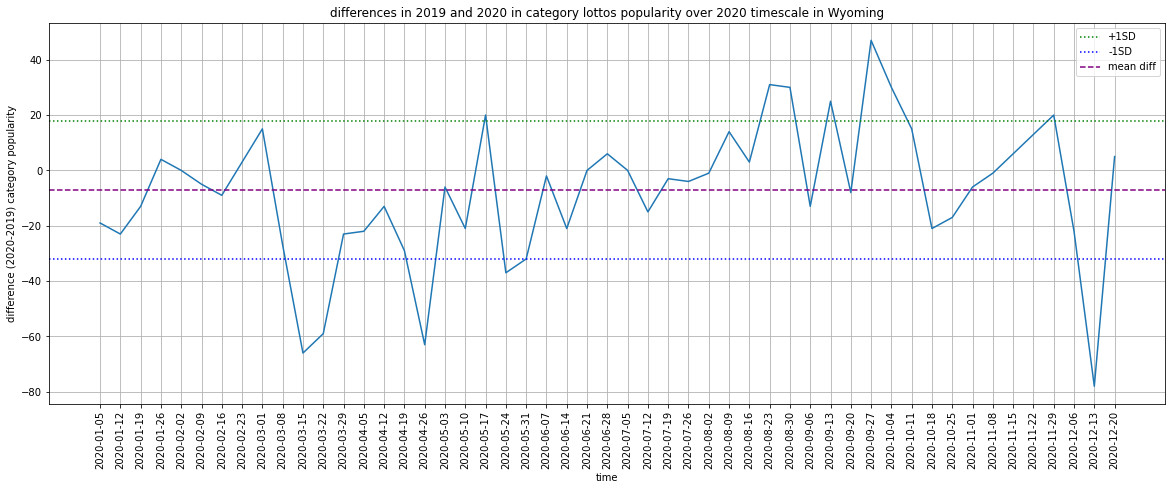

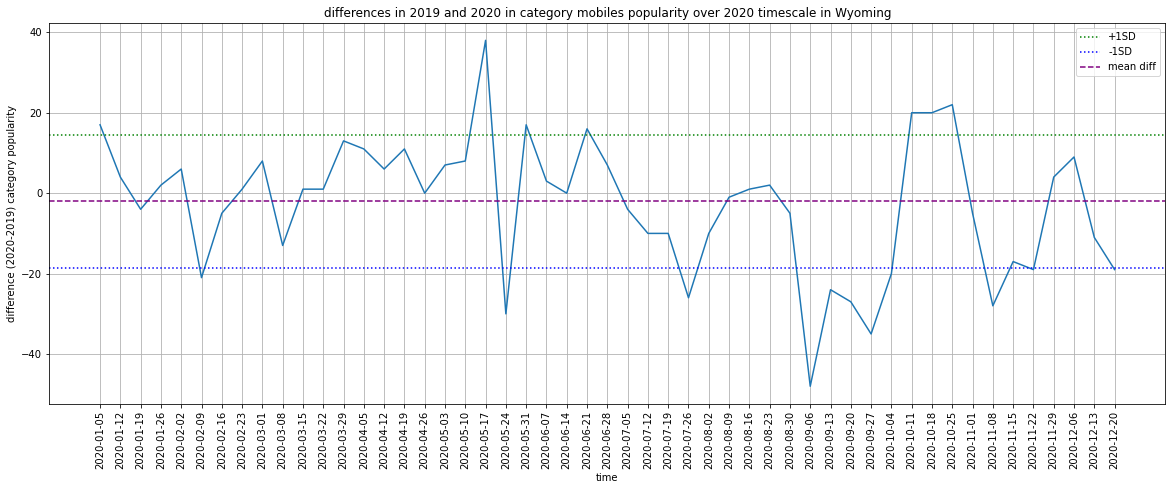

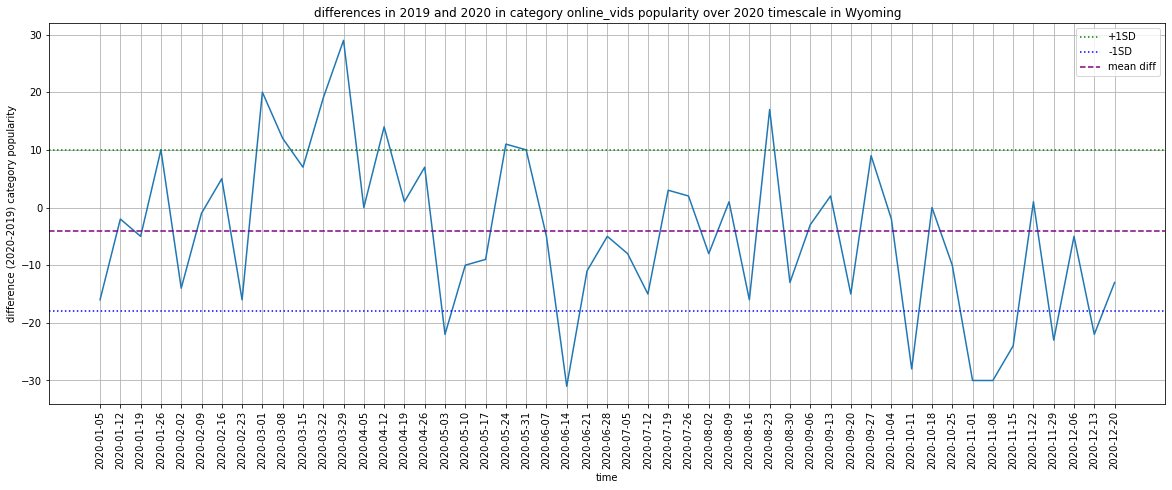

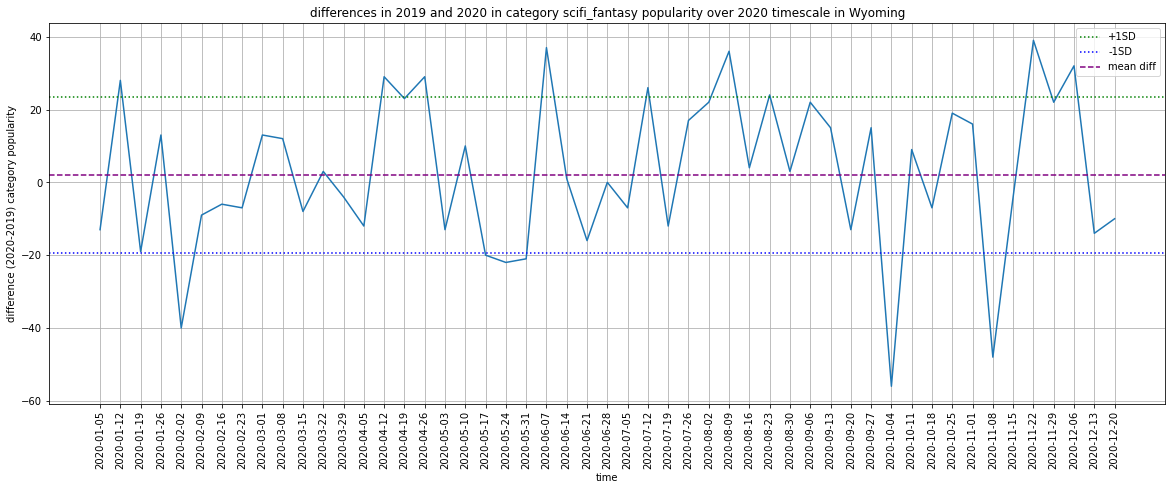

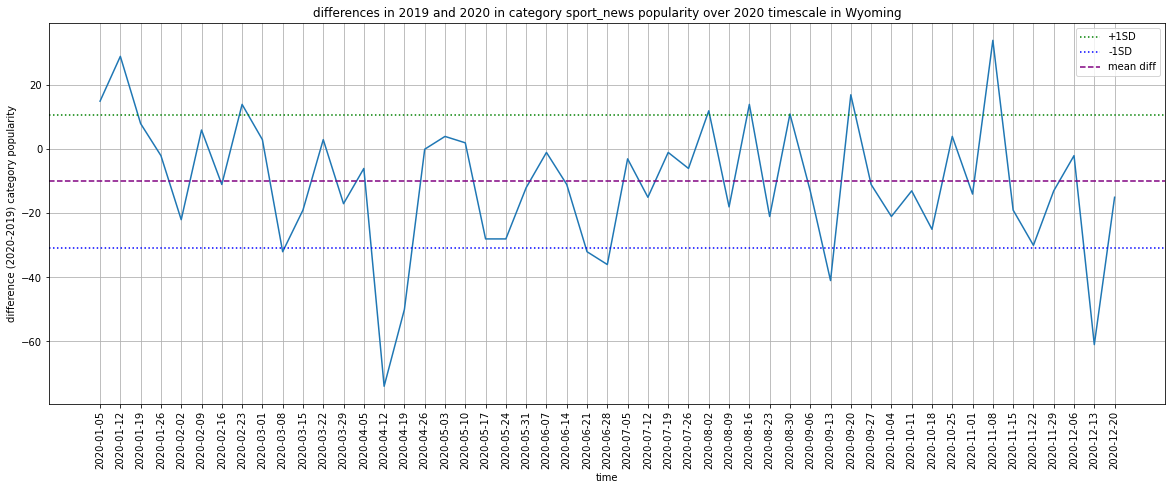

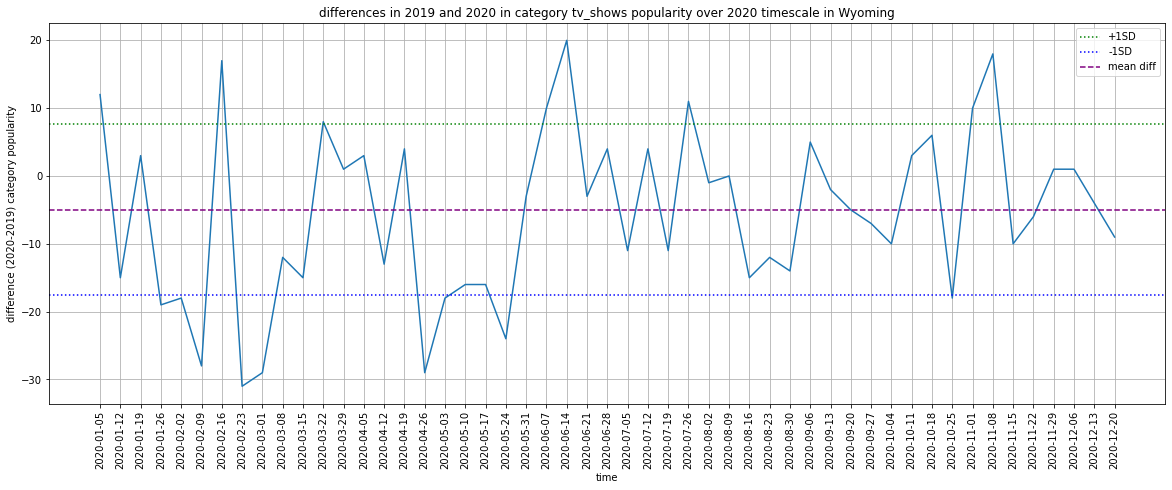

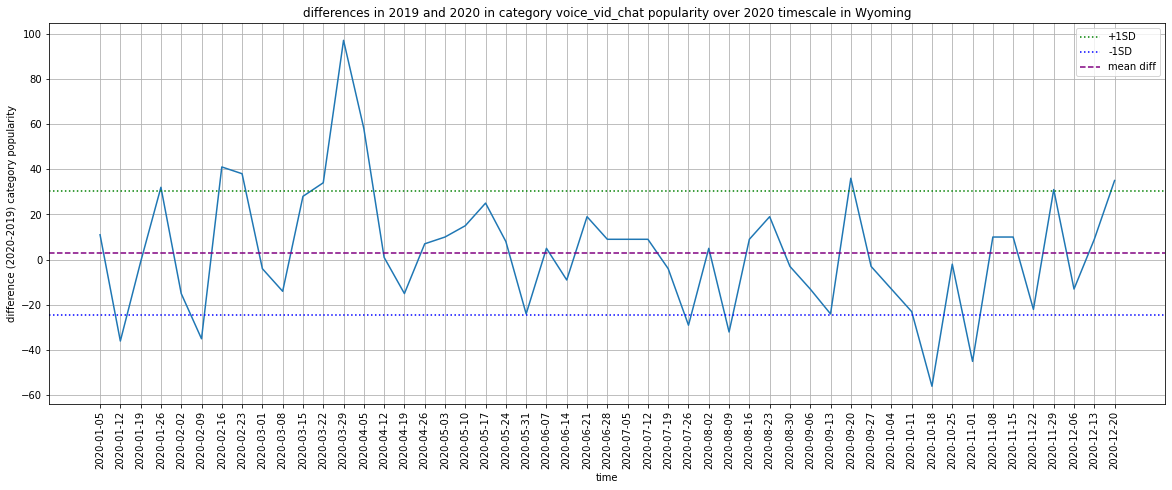

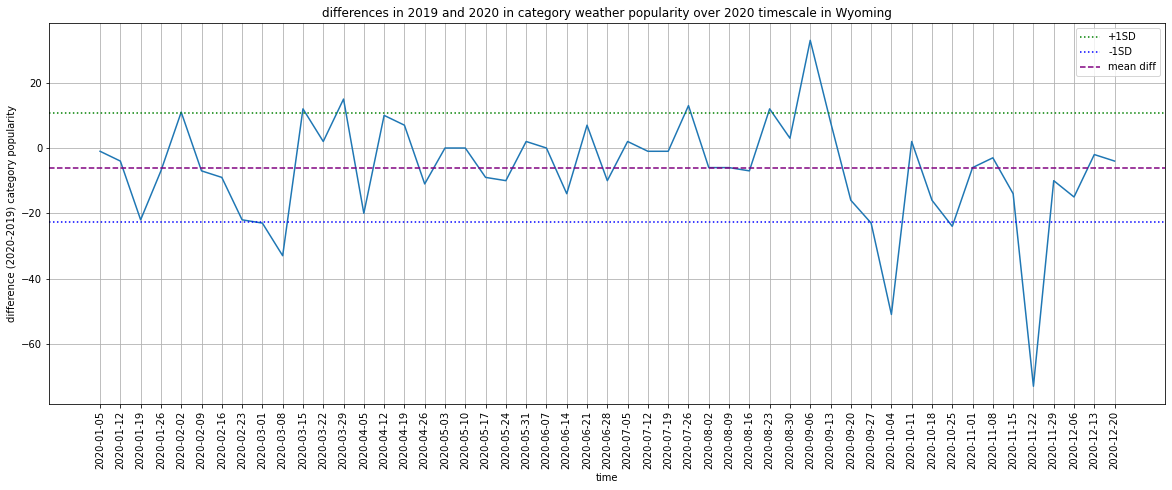

In [68]:
year_diff_graphs(wy_data_2019, wy_data_2020, 'Wyoming')